# 12. Implement Linear Regression problem. For example, based on a dataset comprising of existing set of prices and area/size of the houses,predict the estimated price of a given house.

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
dataset = pd.read_csv('/content/houseprices.csv')
dataset.head()

,Area,Price
0,372.504664,17648.708613
1,161.218544,7606.327793
2,844.815263,42227.733081
3,550.770094,27571.592292
4,499.007442,24372.488520


In [126]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [128]:
print(len(X_train),len(y_train),  len(X_test), len(y_test))

33 33 17 17


In [129]:
class LinearRegression:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print('m is ',self.m)
        print('b is ',self.b)       
    
    def predict(self,X_test):
                
        return self.m * X_test + self.b


In [130]:
regressor = LinearRegression()


In [131]:
regressor.fit(X_train,y_train)

m is  [49.97975739]
b is  [-12.9740026]


In [132]:
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'price')

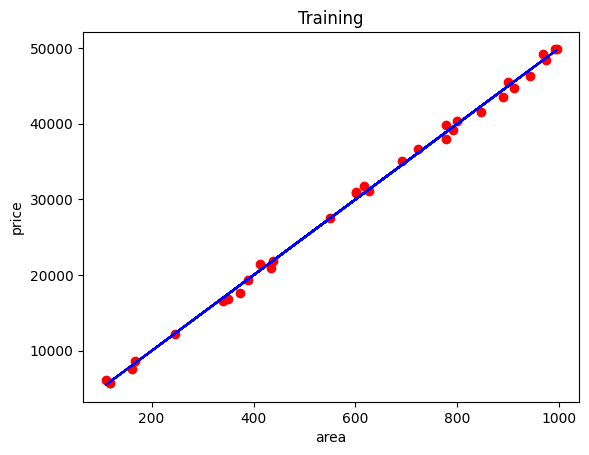

In [133]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Training')
plt.xlabel('area')
plt.ylabel('price')

Text(0, 0.5, 'price')

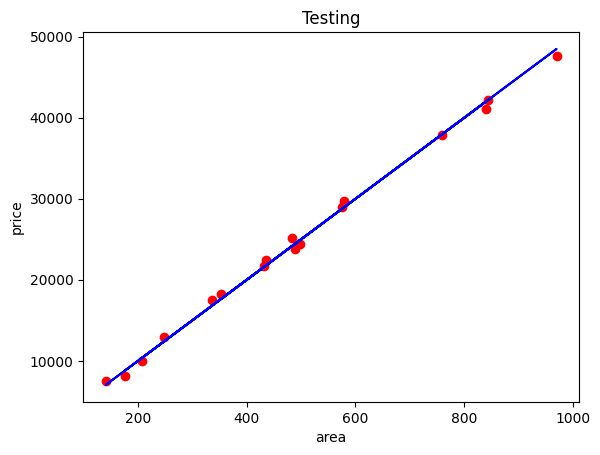

In [134]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Testing')
plt.xlabel('area')
plt.ylabel('price')

# 13. Based on multiple features/variables perform Linear Regression. For example, based on a number of additional features like number of bedrooms, servant room, number of balconies,number of houses of years a house has been built – predict the price of a house.


In [249]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [250]:
df = pd.read_csv('/content/homeprice.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,Area,Bedrooms,Age,Price
0,428.635645,5,15,21625.615922
1,755.488839,2,1,37095.019710
2,662.634921,3,3,33020.292816
3,199.079204,2,20,8888.712606
4,838.612265,5,2,42581.546034


In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [252]:
print(len(X_train),len(y_train),  len(X_test), len(y_test))

40 40 10 10


In [253]:
class MultipleLayerFeatureLinearRegression:
    def __init__(self):
         self.coef_ = None
         self.intercept_ = None
         
    def fit(self,X_train,y_train):
         X_train = np.insert(X_train,0,1,axis=1)
         
         # calcuate the coeffs
         betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
         self.intercept_ = betas[0]
         self.coef_ = betas[1:]
         print('Intercept is ',self.intercept_,' Cofficient are ',self.coef_)
     
    def predict(self,X_test):
         y_pred = np.dot(X_test,self.coef_) + self.intercept_
         return y_pred

In [254]:
model = MultipleLayerFeatureLinearRegression()
model.fit(X_train, y_train)

Intercept is  48.33983123107282  Cofficient are  [ 50.03920782 139.40047365 -72.85144255]


In [255]:
y_pred = model.predict(X_test)

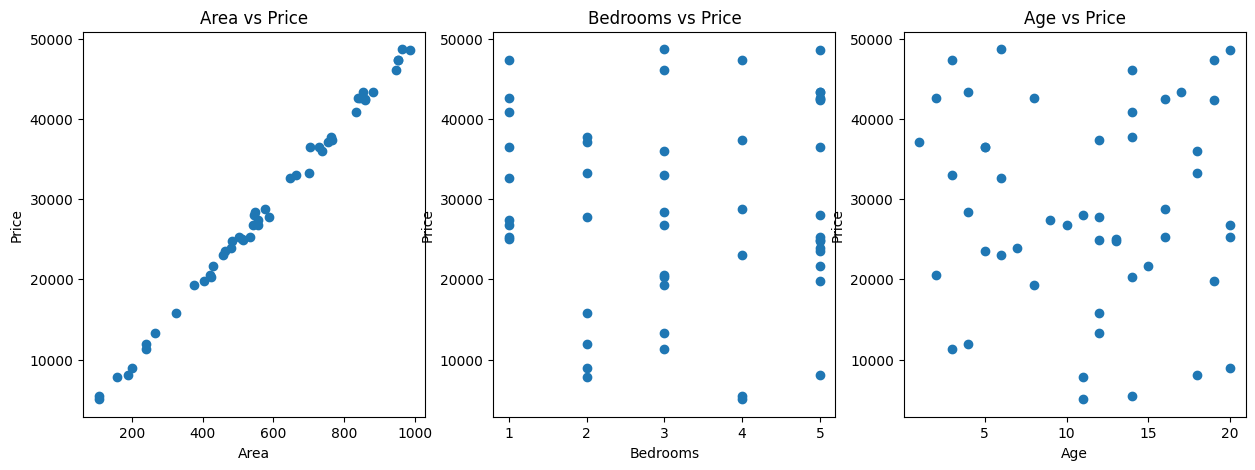

In [256]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(df['Area'], df['Price'])
ax1.set_xlabel('Area')
ax1.set_ylabel('Price')
ax1.set_title('Area vs Price')

ax2.scatter(df['Bedrooms'], df['Price'])
ax2.set_xlabel('Bedrooms')
ax2.set_ylabel('Price')
ax2.set_title('Bedrooms vs Price')

ax3.scatter(df['Age'], df['Price'])
ax3.set_xlabel('Age')
ax3.set_ylabel('Price')
ax3.set_title('Age vs Price')

plt.show()

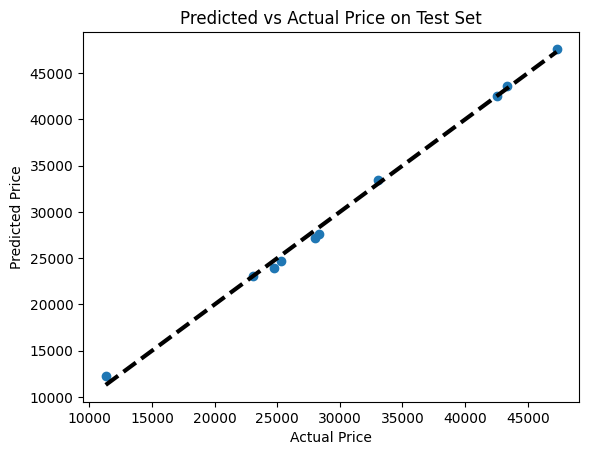

In [257]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price on Test Set')

# Display the plot
plt.show()

# 14.Implement a classification/ logistic regression problem. For example based on different features of students data, classify, whether a student is suitable for a particular activity. Based on the available dataset, a student can also implement another classification problem like checking whether an email is spam or not.

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [285]:
data = pd.read_csv('/content/student.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
data.head()

,Hours_studied,Hours_slept,Result
0,7.329712,7.848625,0
1,14.649273,10.545618,1
2,3.431501,6.127123,0
3,5.888299,6.204252,0
4,3.680169,6.072624,0


In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(len(X_train),len(y_train),  len(X_test), len(y_test))

40 40 10 10


In [267]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [279]:
def cost_function(X, y, theta):
  
    m = len(y)
    
    # hypothesis
    h = sigmoid(X.dot(theta))

    # cost
    J = (1 / m) * np.sum((-y * np.log(h)) - ((1 - y) * np.log(1 - h)))

    return J

In [281]:
def gradient_descent(X, y, theta, alpha, iterations):

    m = len(y)

    # cost history
    J_history = np.zeros((iterations, 1))

    for i in range(iterations):

        # hypothesis
        h = sigmoid(X.dot(theta))

        # gradient
        theta = theta - (alpha / m) * (X.T.dot(h - y))

        # cost
        J_history[i] = cost_function(X, y, theta)

    return (J_history, theta)

In [280]:
def predict(X, theta):
    
        # hypothesis
        h = sigmoid(X.dot(theta))
    
        # convert probabilities to 0 or 1
        h[h >= 0.5] = 1
        h[h < 0.5] = 0
    
        return h

In [287]:
alpha = 0.01
theta = np.zeros((X_train.shape[1], 1))
iterations = 10000
print('Initial cost is: ', cost_function(X_train, y_train, theta))

Initial cost is:  0.6931471805599454


In [288]:
J_history, theta_optimized = gradient_descent(X_train, y_train, theta, alpha, iterations)
print('Optimized cost is: ', J_history[-1])
print('Optimized parameters are: ', theta_optimized)

Optimized cost is:  [0.41143824]
Optimized parameters are:  [[-4.53417377]
 [ 0.31383089]
 [ 0.1815459 ]]


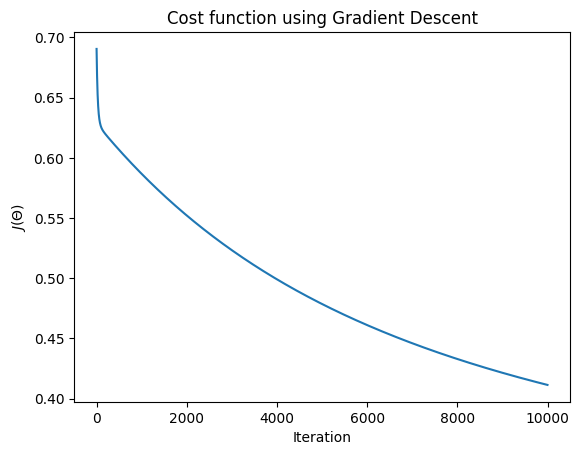

In [289]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')
plt.show()

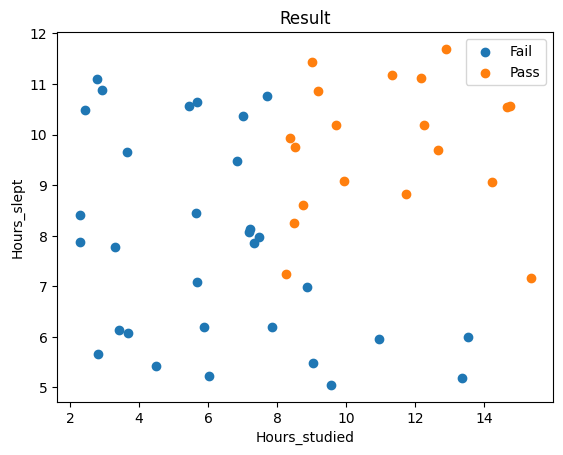

In [290]:
plt.scatter(X[:, 1][y[:, 0] == 0], X[:, 2][y[:, 0] == 0], label='Fail')
plt.scatter(X[:, 1][y[:, 0] == 1], X[:, 2][y[:, 0] == 1], label='Pass')
plt.xlabel('Hours_studied')
plt.ylabel('Hours_slept')
plt.legend()
plt.title('Result')
plt.show()

In [293]:
y_pred = predict(X_test, theta_optimized)
print('Accuracy: {} %'.format(100 * np.sum(y_pred == y_test) / len(y_test)))

Accuracy: 100.0 %


# 15 Use some function for regularization of dataset based on problem 14

In [294]:

# logistic regression with L1 regularization
def logistic_regression_L1(X, y, theta, alpha, iterations, l1):

        m = len(y)    
        # cost history
        J_history = np.zeros((iterations, 1))
    
        for i in range(iterations):
    
            # hypothesis
            h = sigmoid(X.dot(theta))
    
            # gradient
            theta = theta - (alpha / m) * (X.T.dot(h - y)) + (l1 / m) * np.sign(theta)
    
            # cost
            J_history[i] = cost_function(X, y, theta)
    
        return (J_history, theta)

In [295]:
alpha = 0.01
iterations = 10000
# regularization parameter
l1 = 0.1
print('Initial cost is: ', cost_function(X_train, y_train, theta))

Initial cost is:  0.6931471805599454


In [296]:
J_history, theta_optimized = logistic_regression_L1(X_train, y_train, theta, alpha, iterations, l1)
print('Optimized cost is: ', J_history[-1])
print('Optimized parameters are: ', theta_optimized)

Optimized cost is:  [0.32018745]
Optimized parameters are:  [[-27.89570423]
 [  1.31819399]
 [  1.87622135]]


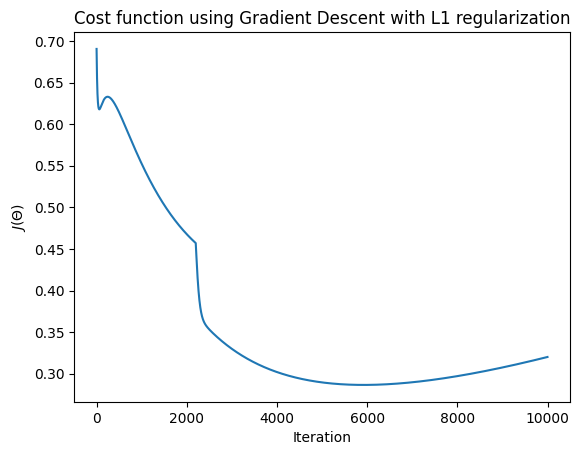

In [297]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent with L1 regularization')
plt.show()

In [298]:
y_pred = predict(X_test, theta_optimized)
print('Accuracy: {} %'.format(100 * np.sum(y_pred == y_test) / len(y_test)))


Accuracy: 100.0 %


# 16 Use some function for neural networks, like Stochastic gradient Descent or backpropagation algorithm to predict the value of a variable based on the dataset of problem 14

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [302]:
data = pd.read_csv('/content/student.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)
data.head()

,Hours_studied,Hours_slept,Result
0,7.329712,7.848625,0
1,14.649273,10.545618,1
2,3.431501,6.127123,0
3,5.888299,6.204252,0
4,3.680169,6.072624,0


In [247]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [200]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [236]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b

  A = sigmoid(Z)
  
  return A

In [246]:
# L-layer feed forward

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]

    A = linear_forward(A_prev, Wl, bl)

          
  return A,A_prev


In [245]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [248]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 100

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = data[['Hours_studied', 'Hours_slept']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = data[['Result']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  0.7285424020448542
Epoch -  2 Loss -  0.7293378301579925
Epoch -  3 Loss -  0.7290280582827963
Epoch -  4 Loss -  0.7287202358232555
Epoch -  5 Loss -  0.7284143478203307
Epoch -  6 Loss -  0.7281103794440932
Epoch -  7 Loss -  0.7278083159927268
Epoch -  8 Loss -  0.727508142891527
Epoch -  9 Loss -  0.7272098456919093
Epoch -  10 Loss -  0.7269134100704149
Epoch -  11 Loss -  0.7266188218277208
Epoch -  12 Loss -  0.7263260668876553
Epoch -  13 Loss -  0.7260351312962137
Epoch -  14 Loss -  0.7257460012205778
Epoch -  15 Loss -  0.7254586629481398
Epoch -  16 Loss -  0.7251731028855295
Epoch -  17 Loss -  0.7248893075576442
Epoch -  18 Loss -  0.7246072636066834
Epoch -  19 Loss -  0.7243269577911845
Epoch -  20 Loss -  0.7240483769850684
Epoch -  21 Loss -  0.7237715081766819
Epoch -  22 Loss -  0.7234963384678492
Epoch -  23 Loss -  0.7232228550729254
Epoch -  24 Loss -  0.7229510453178549
Epoch -  25 Loss -  0.7226808966392341
Epoch -  26 Loss -  0.7224123965833

{'W1': array([[0.09540141, 0.09117589],
        [0.09541098, 0.09110489]]),
 'b1': array([[-0.00129987],
        [-0.00131423]]),
 'W2': array([[0.04190988],
        [0.042359  ]]),
 'b2': array([[0.04240612]])}